In [1]:
import os
import sys
import scipy.io
import scipy.misc
import imageio
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
from Functions import *
import numpy as np
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()
%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


input your content image name with the image extension Me.JPG


This is the content image :



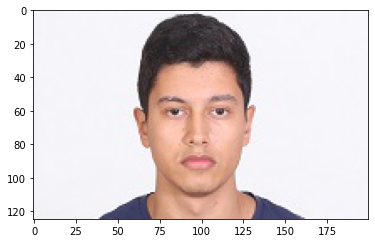

In [2]:
# Display the content image

content_path = input("input your content image name with the image extension")

Content = imageio.imread("Contents/" + content_path)

print("This is the content image :")
print("")

imshow(Content)

input your style image path with the image extension van-gogh.jpg


This is the style image :



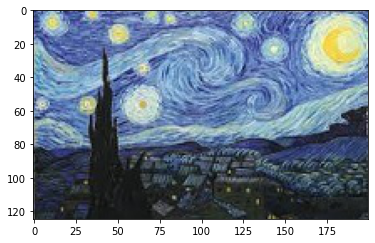

In [3]:
# Display the style image

style_path = input("input your style image path with the image extension")

Style = imageio.imread("Styles/" + style_path)

print("This is the style image :")
print("")

imshow(Style)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


This is the generated image :



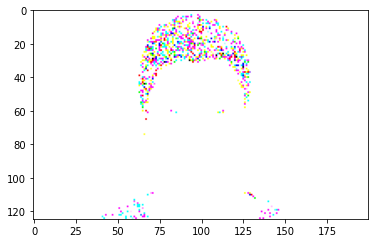

In [4]:
# Create & Display the generated image

Generated = noise_image(Content)

print("This is the generated image :")
print("")

imshow(Generated)

In [5]:
Content = reshape_normalize_image(Content)

Style = reshape_normalize_image(Style)

Generated = reshape_normalize_image(Generated)

STYLE_LAYERS = [('conv1_1', 0.2), ('conv2_1', 0.2), ('conv3_1', 0.2), ('conv4_1', 0.2), ('conv5_1', 0.2)]

In [6]:
tf.reset_default_graph()

sess = tf.InteractiveSession()

model = load_vgg_model("Pre-trained/imagenet-vgg-verydeep-19.mat")

sess.run(model['input'].assign(Content))

out = model['conv4_1']

a_C = sess.run(out)

a_G = out

J_content = content_cost(a_C, a_G)

sess.run(model['input'].assign(Style))

J_style = style_cost(model, STYLE_LAYERS, sess)

J = cost(J_content, J_style)

In [7]:
model_nn(sess, model, Generated, J, J_content, J_style)

Iteration 0 :
total cost = 1142.5547
content cost = 34.070656
style cost = 277.121
Iteration 10 :
total cost = 1489.0052
content cost = 42.434414
style cost = 361.6427
Iteration 20 :
total cost = 675.191
content cost = 38.787415
style cost = 159.10089
Iteration 30 :
total cost = 274.48145
content cost = 35.537857
style cost = 59.735897
Iteration 40 :
total cost = 145.59708
content cost = 32.59326
style cost = 28.250956
Iteration 50 :
total cost = 91.37666
content cost = 28.870132
style cost = 15.626634
Iteration 60 :
total cost = 60.399014
content cost = 24.47654
style cost = 8.9806185
Iteration 70 :
total cost = 79.965836
content cost = 21.834309
style cost = 14.532882
Iteration 80 :
total cost = 146.53583
content cost = 32.334354
style cost = 28.550367
Iteration 90 :
total cost = 96.17175
content cost = 30.4321
style cost = 16.434914


array([[[[-0.80169   ,  0.9621089 , -1.3988591 ],
         [-0.5077265 ,  0.4575603 , -1.3504215 ],
         [-0.00384834,  0.6416934 , -0.95147437],
         ...,
         [ 0.3236653 ,  0.80079585, -0.80089265],
         [-0.03066781,  0.6315925 , -0.79312843],
         [-1.1183687 ,  2.560713  , -1.8671743 ]],

        [[-0.30683303,  0.93284315, -1.0733979 ],
         [-0.30649164,  0.49332872, -0.7659335 ],
         [-0.38202164,  0.07618088, -0.7437211 ],
         ...,
         [-0.01696333,  0.621037  , -0.67429703],
         [ 0.2900362 ,  1.0382106 , -1.0656939 ],
         [-0.6537142 ,  0.82568616, -1.1385128 ]],

        [[-1.0849823 ,  0.69925696, -1.156478  ],
         [-0.80227834,  0.7575224 ,  0.7807388 ],
         [-0.01698675, -0.33506694,  0.12390482],
         ...,
         [-0.53654754, -0.8560577 ,  0.7255932 ],
         [ 0.0856659 , -0.02352141, -0.57618076],
         [-0.20608436,  0.33317143,  0.537094  ]],

        ...,

        [[-0.5636728 , -0.04362945, -0

In [8]:
sess.close()

This is the generated image :



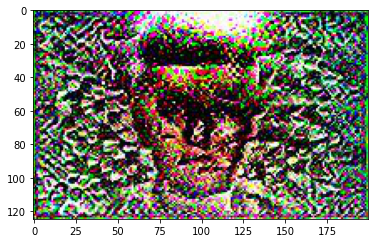

In [9]:
# Display the generated image

generated_path = 'Generated/generated_image.jpg'

Generated = imageio.imread(generated_path)

print("This is the generated image :")
print("")

imshow(Generated)

## | This is just a first version, it needs more tuning.